> imdb 영화리뷰 분류

In [1]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
np.random.seed(7)

In [2]:
top_words = 5000 #상위 단어 5000개

#학습용,검증용 5:5
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

17464789/17464789 [==============================] - 2s 0us/step
(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 1

In [3]:
max_review_length = 500 #리뷰의 최대 길이를 500으로 설정

# 길이가 짧으면 공백으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(25000, 500)
(25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

Epoch 1/10
16/16 [==============================] - 5s 34ms/step - loss: 0.6929 - accuracy: 0.4920
Epoch 2/10
16/16 [==============================] - 0s 30ms/step - loss: 0.6773 - accuracy: 0.6890
Epoch 3/10
16/16 [==============================] - 0s 30ms/step - loss: 0.7065 - accuracy: 0.6760
Epoch 4/10
16/16 [==============================] - 0s 31ms/step - loss: 0.6227 - accuracy: 0.7620
Epoch 5/10
16/16 [==============================] - 1s 32ms/step - loss: 0.6037 - accuracy: 0.7740
Epoch 6/10
16/16 [==============================] - 0s 30ms/step - loss: 0.5560 - accuracy: 0.8390
Epoch 7/10
16/16 [==============================] - 0s 30ms/step - loss: 0.4700 - accuracy: 0.8750
Epoch 8/10
16/16 [==============================] - 0s 30ms/step - loss: 0.3335 - accuracy: 0.9010
Epoch 9/10
16/16 [==============================] - 0s 31ms/step - loss: 0.2221 - accuracy: 0.9300
Epoch 10/10
32/32 [==============================] - 0s 10ms/step - loss: 0.6190 - accuracy: 0.7060
Accuracy:

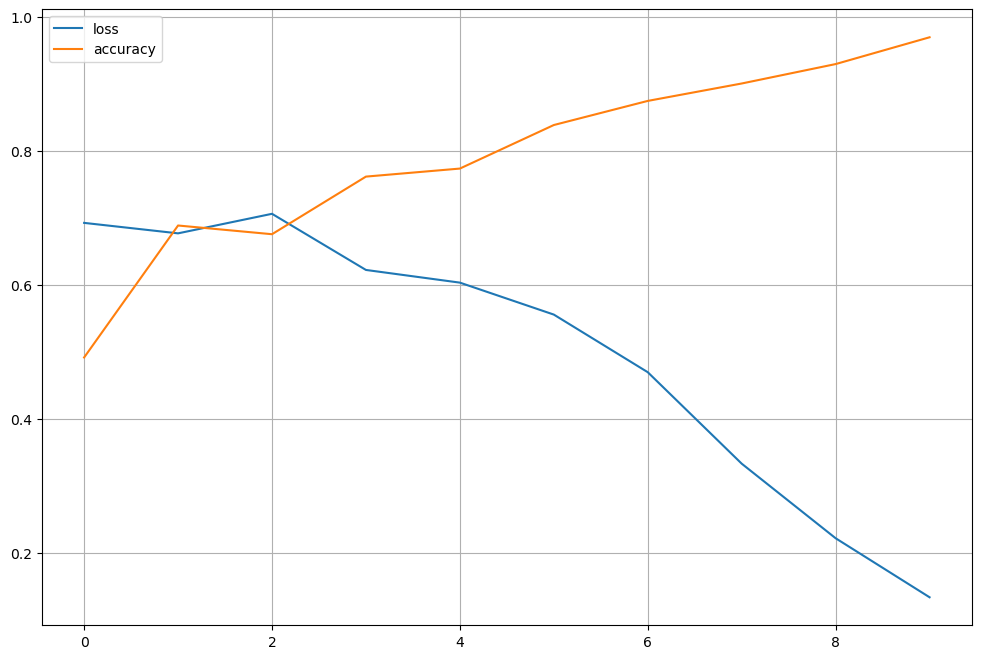

In [5]:
# create the model
embedding_vecor_length = 32 #벡터사이즈
model = Sequential()

#임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈(최대단어개수))
model.add(Embedding(top_words, embedding_vecor_length,
                    input_length = max_review_length))

#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로
model.add(LSTM(100)) # Long Short-Term Memory
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
                metrics=['accuracy'])

hist = model.fit(X_train[:1000], y_train[:1000], epochs=10,
                batch_size=64)

# Final evaluation of the model
scores = model.evaluate(X_train[:1000], y_train[:1000], verbose=1)
scores2 = model.evaluate(X_test[:1000], y_test[:1000], verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Accuracy: %.2f%%" % (scores2[1]*100))

# 모델 학습 과정 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

> 로이터 뉴스 분류

In [6]:
from keras.datasets import reuters
#로이터 뉴스 데이터 로딩, num_words 사용할 상위 단어수, maxlen 상위 1000개 단어
(X_train, y_train), (X_test, y_test) = reuters.load_data( num_words=1000,test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [8]:
from tensorflow.keras.preprocessing import sequence
# 가장 긴 길이를 기준으로 사이즈를 맞추고 남는 부분을 0으로 채움
X_train = sequence.pad_sequences(X_train, maxlen=50)
X_test = sequence.pad_sequences(X_test, maxlen=50)

In [9]:
from keras.utils import np_utils
#원핫인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model = Sequential()

#임베딩 레이어 Embedding(단어의개수, 벡터크기, 입력사이즈)
model.add(Embedding(1000,100)) #1000개의 단어가 입력되어 100차원으로 출력

#문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로, 출력노드수 100
model.add(LSTM(100)) # Long Short-Term Memory
model.add(Dense(46, activation='softmax')) #46개의 뉴스 카테고리, 다분류여서 softmax 사용
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=3)
hist = model.fit(X_train,y_train,batch_size=128,epochs=100,
                validation_split=0.2,callbacks=[early_stopping])

print("\n 정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
57/57 [==============================] - 3s 22ms/step - loss: 2.7176 - accuracy: 0.3492 - val_loss: 2.4134 - val_accuracy: 0.3450
Epoch 2/100
57/57 [==============================] - 1s 12ms/step - loss: 2.4043 - accuracy: 0.3549 - val_loss: 2.3690 - val_accuracy: 0.3450
Epoch 3/100
57/57 [==============================] - 1s 12ms/step - loss: 2.1267 - accuracy: 0.4625 - val_loss: 2.0084 - val_accuracy: 0.4908
Epoch 4/100
57/57 [==============================] - 1s 11ms/step - loss: 1.9121 - accuracy: 0.5076 - val_loss: 1.8606 - val_accuracy: 0.5225
Epoch 5/100
57/57 [==============================] - 1s 12ms/step - loss: 1.7668 - accuracy: 0.5425 - val_loss: 1.7569 - val_accuracy: 0.5314
Epoch 6/100
57/57 [==============================] - 1s 11ms/step - loss: 1.6784 - accuracy: 0.5663 - val_loss: 1.6969 - val_accuracy: 0.5732
Epoch 7/100
57/57 [==============================] - 1s 11ms/step - loss: 1.5956 - accuracy: 0.5911 - val_loss: 1.6387 - val_accuracy: 0.5849
Epoch 

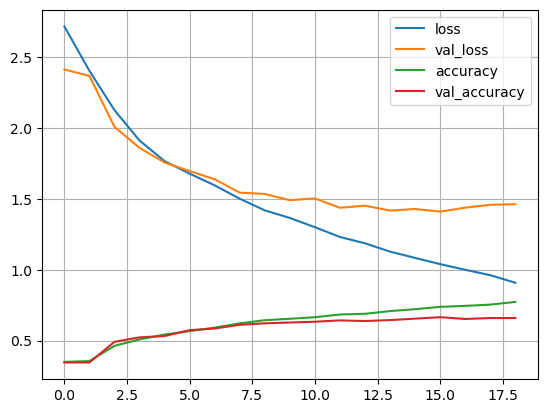

In [12]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [15]:
import numpy as np
pred = model.predict(X_test)
print(np.argmax(pred[19]))
print(np.argmax(y_test[19]))

71/71 [==============================] - 0s 4ms/step
3
3


> 스팸메일 분류

In [16]:
import pandas as pd
df = pd.read_csv('c:/vscode/data/spam/spam.csv',encoding='latin1')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# ham => 0, spam => 1 로 바꾸어 저장
df['v1'] = df['v1'].replace(['ham','spam'],[0,1])
df[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


0    4825
1     747
Name: v1, dtype: int64


<AxesSubplot:>

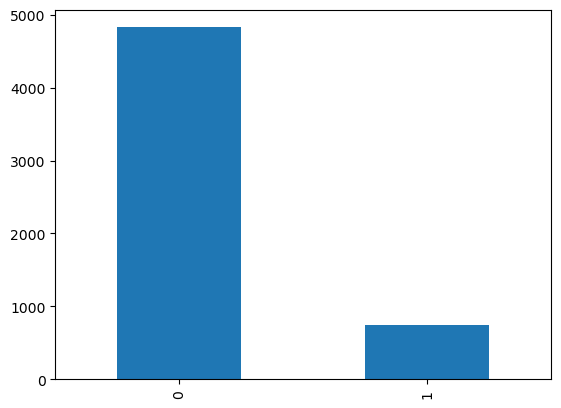

In [19]:
print(df['v1'].value_counts())
df['v1'].value_counts().plot(kind='bar')

0    747
1    747
Name: v1, dtype: int64


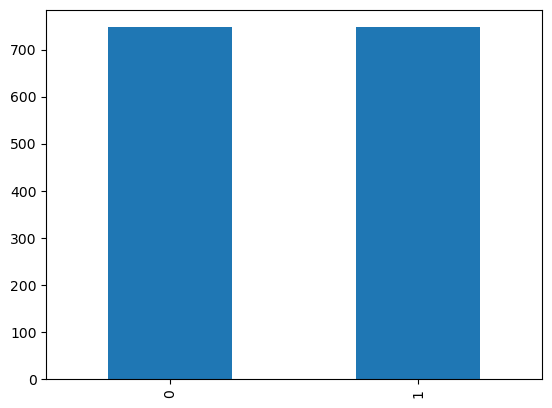

In [20]:
X=df[['v2']] #독립변수
y=df['v1'] #종속변수

#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=['v2'] )
y_samp = pd.DataFrame(data=y_sample,columns=['v1'])
df_samp=pd.concat([X_samp,y_samp],axis=1)
print(df_samp['v1'].value_counts())
df_samp['v1'].value_counts().plot(kind='bar')

X = df_samp['v2']
y = df_samp['v1']

In [21]:
from keras.preprocessing.text import Tokenizer
#단어 집합을 만들고 단어에 고유한 숫자 인덱스를 부여
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

#텍스트를 시퀀스로 변환(단어의 인덱스로만 구성된 새로운 리스트)
sequences = tokenizer.texts_to_sequences(X)
print(sequences[:5])

[[1486, 49, 801, 1487, 18, 336, 87, 26, 2274, 45, 27, 173], [1148, 14, 4, 25, 613], [174, 149, 4, 2, 189, 5, 105, 17, 614, 613], [946, 88, 38, 399, 702, 1, 2275, 1488, 130, 2276, 26, 1489, 242, 45, 702, 1, 2277, 2278, 24, 46, 1149], [7, 291, 1490, 802, 553, 53, 316, 26, 803, 703, 25, 63, 47, 217, 1491, 13, 434, 337, 97]]


In [40]:
#단어와 인덱스 목록
word_to_index = tokenizer.word_index
#word_to_index
for idx,word in enumerate(word_to_index):
    print(idx+1,word, end=',')
    if idx>8:
        break 

1 to,2 you,3 a,4 call,5 i,6 the,7 u,8 your,9 for,10 is,

메일의 최대 길이 : 77
메일의 평균 길이 : 19.846051


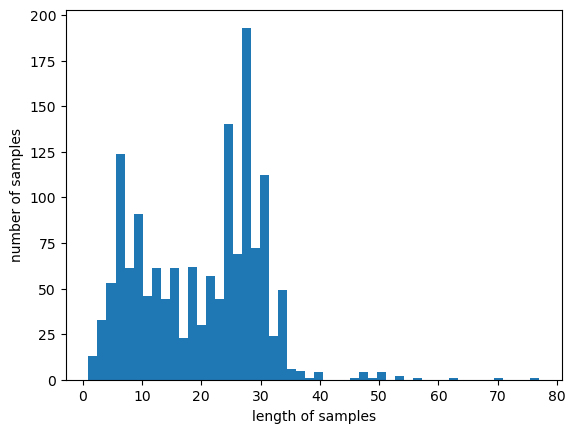

In [25]:
import matplotlib.pyplot as plt
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples') # 길이
plt.ylabel('number of samples') # 샘플수
plt.show()

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#최대 사이즈에 맞추어 빈칸에 0으로 채움
data = pad_sequences(X_data, maxlen = 77)
print("학습용 데이터의 크기(shape): ", data.shape)

#학습용:검증용 8:2로 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y,
test_size=0.2, stratify=y, random_state=10)

학습용 데이터의 크기(shape):  (1494, 77)


In [35]:
from keras.layers import Embedding, Dense, LSTM, SimpleRNN
from keras.models import Sequential

model = Sequential()
# Embedding(입력사이즈,출력사이즈)
model.add(Embedding(len(word_to_index)+1, 32))
# model.add(SimpleRNN(32)) # output size 32
model.add(LSTM(32)) # Long Short-Term Memory
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# 순환신경망 말고 일반 신경망으로 해도되긴함
# 텍스트는 순서가 있기 때문에 순환신경망(시퀀스)이 더 잘 맞음
# from keras.layers import Embedding, Dense, LSTM, SimpleRNN
# from keras.models import Sequential
# model = Sequential()
# model.add(Dense(64, input_shape=(77,),  activation='relu'))
                            # 독립변수의 수
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()

In [36]:
hist = model.fit(X_train, y_train.values, epochs=10,
                batch_size=64, validation_split=0.2)
model.evaluate(X_test, y_test.values, verbose=0)

Epoch 1/10
15/15 [==============================] - 2s 38ms/step - loss: 0.6201 - accuracy: 0.7856 - val_loss: 0.4887 - val_accuracy: 0.8619
Epoch 2/10
15/15 [==============================] - 0s 11ms/step - loss: 0.4140 - accuracy: 0.8828 - val_loss: 0.3401 - val_accuracy: 0.9038
Epoch 3/10
15/15 [==============================] - 0s 11ms/step - loss: 0.2873 - accuracy: 0.9121 - val_loss: 0.2379 - val_accuracy: 0.9414
Epoch 4/10
15/15 [==============================] - 0s 11ms/step - loss: 0.1846 - accuracy: 0.9519 - val_loss: 0.1614 - val_accuracy: 0.9623
Epoch 5/10
15/15 [==============================] - 0s 11ms/step - loss: 0.1196 - accuracy: 0.9728 - val_loss: 0.1223 - val_accuracy: 0.9582
Epoch 6/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0901 - accuracy: 0.9801 - val_loss: 0.1057 - val_accuracy: 0.9749
Epoch 7/10
15/15 [==============================] - 0s 10ms/step - loss: 0.0605 - accuracy: 0.9864 - val_loss: 0.1089 - val_accuracy: 0.9665
Epoch 8/10
15

[0.1259513944387436, 0.9632107019424438]

In [34]:
# SimpleRNN
print("\n 정확도 : %.4f" % (model.evaluate(X_train, y_train)[1]))
print("\n 정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

38/38 [==============================] - 1s 16ms/step - loss: 0.0393 - accuracy: 0.9874

 정확도 : 0.9874
10/10 [==============================] - 0s 13ms/step - loss: 0.1301 - accuracy: 0.9599

 정확도 : 0.9599


In [37]:
# LSTM
print("\n 정확도 : %.4f" % (model.evaluate(X_train, y_train)[1]))
print("\n 정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

38/38 [==============================] - 1s 7ms/step - loss: 0.0423 - accuracy: 0.9916

 정확도 : 0.9916
10/10 [==============================] - 0s 5ms/step - loss: 0.1260 - accuracy: 0.9632

 정확도 : 0.9632


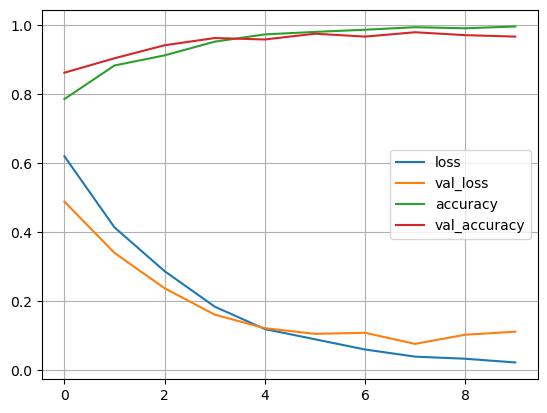

In [38]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [39]:
print(model.predict(X_test[:3]))
print(y_test[:3])

1/1 [==============================] - 0s 303ms/step
[[0.98153114]
 [0.0509908 ]
 [0.99529773]]
1329    1
77      0
934     1
Name: v1, dtype: int64


> 한글텍스트 분류

In [41]:
import pandas as pd
train_data = pd.read_csv('c:/vscode/data/text/ratings_train.csv',encoding='ms949')
test_data = pd.read_csv('c:/vscode/data/text/ratings_test.csv',encoding='ms949')

In [43]:
len(train_data), len(test_data)

(150000, 50000)

In [42]:
# 중복되지 않은 데이터 확인
train_data['document'].nunique(), train_data['label'].nunique()
# 중복값이 약 4000개

(146157, 2)

In [44]:
# train_data 전처리
#중복값 제거
train_data.drop_duplicates(subset=['document'], inplace=True)
# len(train_data)

#특수문자,기호 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# train_data[:3]

#공백 제거
import numpy as np
train_data['document'] = train_data['document'].str.replace('^ +', "")
train_data['document'].replace('', np.nan, inplace=True)
# train_data.isnull().sum()

#null 샘플 제거
train_data = train_data.dropna(how = 'any')
# train_data.isnull().values.any()

146158

In [55]:
# test_data에도 동일한 과정 적용
test_data.drop_duplicates(subset = ['document'],inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'] = test_data['document'].str.replace('^ +', "")
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')
len(test_data)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_14572\1475480796.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_14572\1475480796.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', "")


48395

In [56]:
# 불용어 사전
stopwords = ['의','가','이','은','들','는','좀','잘','걍',
            '과','도','를','으로','자','에','와','한','하다']

In [57]:
from konlpy.tag import Okt
okt = Okt()
X_train = []
#형태소 분석 (train data 토큰화)
#for sentence in train_data['document']:
for sentence in train_data['document'][:10000]:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)
print(X_train[:3])

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [58]:
# 테스트 데이터에 대한 토큰화
X_test = []
#for sentence in test_data['document']:
for sentence in test_data['document'][:10000]:
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_test.append(temp_X)

In [60]:
# 출현빈도가 3회 미만인 단어들
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어수
rare_cnt = 0
total_freq = 0
rare_freq = 0
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
print(total_cnt) #단어집합 크기
print(rare_cnt) #희귀단어수

vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

12445
8200


In [61]:
# 정수 인코딩
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train) #텍스트를 숫자 시퀀스로 변환
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
print(X_train[:3])

단어 집합의 크기 : 4246
[[54, 681, 16, 239, 782], [682, 349, 38, 641, 1, 163, 1845, 23, 899, 728, 20], [359, 1536, 2035, 2, 228, 8]]


In [69]:
import joblib
joblib.dump(tokenizer, 'tokenizer.h5')

['tokenizer.h5']

In [62]:
y_train = np.array(train_data['label'][:10000])
y_test = np.array(test_data['label'][:10000])

max_len = max(len(l) for l in X_train) #리뷰의 최대 길이

cnt = 0
for s in X_train:
    if(len(s) <= 30):
        cnt = cnt + 1
#최대 길이 이하인 샘플의 비율
(cnt / len(X_train))*100

95.24000000000001

In [63]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [64]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         424600    
                                                                 
 lstm_3 (LSTM)               (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 541,977
Trainable params: 541,977
Non-trainable params: 0
_________________________________________________________________


In [70]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
mc = ModelCheckpoint('RNN_model.h5', monitor='val_acc',
                mode='max', verbose=1, save_best_only=True)
model.fit(X_train, y_train, batch_size = 64, epochs=10,
        validation_split=0.2, callbacks=[es, mc])
model.evaluate(X_test, y_test)

Epoch 1/10
123/125 [============================>.] - ETA: 0s - loss: 0.2020 - acc: 0.9174
Epoch 1: val_acc improved from -inf to 0.78250, saving model to RNN_model.h5
125/125 [==============================] - 1s 12ms/step - loss: 0.2043 - acc: 0.9169 - val_loss: 0.5216 - val_acc: 0.7825
Epoch 2/10
122/125 [============================>.] - ETA: 0s - loss: 0.1894 - acc: 0.9252
Epoch 2: val_acc improved from 0.78250 to 0.78800, saving model to RNN_model.h5
125/125 [==============================] - 1s 10ms/step - loss: 0.1887 - acc: 0.9250 - val_loss: 0.6022 - val_acc: 0.7880
Epoch 3/10
124/125 [============================>.] - ETA: 0s - loss: 0.1730 - acc: 0.9304
Epoch 3: val_acc did not improve from 0.78800
125/125 [==============================] - 1s 10ms/step - loss: 0.1732 - acc: 0.9302 - val_loss: 0.6146 - val_acc: 0.7795
Epoch 4/10
124/125 [============================>.] - ETA: 0s - loss: 0.1567 - acc: 0.9378
Epoch 4: val_acc did not improve from 0.78800
125/125 [============

[0.7514598965644836, 0.7851999998092651]

In [73]:
loaded_model = load_model('RNN_model.h5')
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5803 - acc: 0.7924


[0.5803278088569641, 0.7924000024795532]

In [71]:
def review_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence 
                    if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) #정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(model.predict(pad_new)) # 예측
    if(score > 0.5):
        print(f"{score * 100:.2f}% 확률로 긍정 리뷰입니다.\n")
    else:
        print(f"{(1 - score) * 100:.2f}% 확률로 부정 리뷰입니다.\n")

In [74]:
print(review_predict('연기는 잔잔하게 볼 만 합니다'))
print(review_predict('영화의 주제가 뭔지 모르겠음'))
print(review_predict('익살스런 연기가 돋보였던 영화'))
print(review_predict('기대보다는 스토리가 큰 감흥은 없습니다'))

1/1 [==============================] - 0s 20ms/step
98.33% 확률로 긍정 리뷰입니다.

None
1/1 [==============================] - 0s 22ms/step
93.59% 확률로 부정 리뷰입니다.

None
1/1 [==============================] - 0s 23ms/step
99.12% 확률로 긍정 리뷰입니다.

None
1/1 [==============================] - 0s 22ms/step
99.90% 확률로 부정 리뷰입니다.

None


In [77]:
review_predict('심심할 때 보기에 나쁘진 않아요')

1/1 [==============================] - 0s 22ms/step
93.20% 확률로 부정 리뷰입니다.



> 문장 만들기

In [84]:
# 메모리 부족할 때
# 메모리 필요한만큼만 사용하는 옵션
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [85]:
import pandas as pd
df=pd.read_csv('c:/vscode/data/text/ratings_all.csv',encoding='ms949')
df=df[df['label'] == 1]
df=df.sample(frac=1)
df

,document,label
67971,좋은영화네요!!!,1
184652,저도 이 영화 꼭좀 구하고 싶은데...,1
178362,누적관객수 14 돌파! ㅋㅋ,1
19141,이거 평점이 왤케 낮지?? 좋은 영환데.,1
62209,톰크루즈는 연기 가 아니라 그냥 본인같아;; 진짜 대단,1
...,...,...
107195,평점 너무 낮다!! 동화의 주연들이 조연이 되는 참신함이 좋았다.,1
21557,나름 재미있었음 ㅋ ㅋ ㅋ ~,1
99573,참 사회생활안해본 어린애들쓴글보면 웃기네 실제로 저런일이 본인한테 닥치면 그때도 어...,1
117295,저 포스터 만든 놈을 대인지뢰위에 앉혀놓고 싶다,1


In [86]:
# 다 하면 오래걸려서 3000건만 학습시킬 예정
text='\n'.join(map(str,df['document'].values[10000:13000]))
text[:100]

'황홀했던 13주 였다... 칼세이건이 그립다\n내생의 최고의 드라마\n재밌다\n아이러브 밀라요보비치 ㅋㅋㅋㅋㅋㅋ\n이건 영화가 아니라 혁명\n인생 최고의 영화\n한마디로 이 영화 정말 괜찮다'

In [87]:
len(text)

108720

In [96]:
# 정수 인코딩
from keras.preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
vocab_size = len(t.word_index)+1
print(vocab_size) #단어 집합 사이즈
# t.word_index

# 단어에 번호
sequences=list()
for line in text.split('\n'): #문장 나누기
    encoded=t.texts_to_sequences([line])[0] #단어를 숫자로 변환
    for i in range(1,len(encoded)):
        sequence=encoded[:i+1]
        sequences.append(sequence)
print(len(sequences))
# sequences

#문장의 최대 길이
max_len=max(len(l) for l in sequences)
print(max_len) 

12882
20680
38


In [98]:
#제로패딩
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences,maxlen=max_len,padding='pre')

In [99]:
import numpy as np
sequences = np.array(sequences)
X = sequences[:, :-1]
y = sequences[:,-1]

from keras.utils import np_utils
#원핫인코딩
y = np_utils.to_categorical(y,num_classes=vocab_size)
                                #vocab_size 단어수

In [100]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM
from keras.layers import Embedding
from keras.optimizers import Adam

model=Sequential()
model.add(Embedding(vocab_size,500,input_length=max_len-1))
                    #단어수,벡터사이즈,입력사이즈
model.add(LSTM(128))
model.add(Dense(vocab_size,activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 37, 500)           6441000   
                                                                 
 lstm_4 (LSTM)               (None, 128)               322048    
                                                                 
 dense_5 (Dense)             (None, 12882)             1661778   
                                                                 
Total params: 8,424,826
Trainable params: 8,424,826
Non-trainable params: 0
_________________________________________________________________


In [101]:
# 그냥 fit 돌리면 메모리 부족으로 학습이 실패함
# 데이터 나눠서 여러번 학습시키기
import os
import glob
[os.remove(f) for f in glob.glob('*.h5')]

[]

In [102]:
import time
from keras.models import load_model

x_size = len(X)
n = 800
for i in range(0,x_size,n):
    print('step ',int(i/n)+1,'/',int(x_size/n))
    X1=X[i:min(i + n, x_size)]
    y1=y[i:min(i + n, x_size)]
    model.fit(X1,y1,batch_size=64,epochs=30, verbose=1)
    model.save(f'sentence{int(i/n)}.h5')
    tf.keras.backend.clear_session()
    del model
    time.sleep(2)
    model = load_model(f'sentence{int(i/n)}.h5')

step  1 / 25
Epoch 1/30
13/13 [==============================] - 2s 27ms/step - loss: 9.3040 - accuracy: 0.0075
Epoch 2/30
13/13 [==============================] - 0s 25ms/step - loss: 7.2081 - accuracy: 0.0150
Epoch 3/30
13/13 [==============================] - 0s 25ms/step - loss: 6.5513 - accuracy: 0.0075
Epoch 4/30
13/13 [==============================] - 0s 26ms/step - loss: 6.1242 - accuracy: 0.0162
Epoch 5/30
13/13 [==============================] - 0s 25ms/step - loss: 5.6557 - accuracy: 0.0262
Epoch 6/30
13/13 [==============================] - 0s 27ms/step - loss: 4.9333 - accuracy: 0.0512
Epoch 7/30
13/13 [==============================] - 0s 25ms/step - loss: 4.1452 - accuracy: 0.1350
Epoch 8/30
13/13 [==============================] - 0s 25ms/step - loss: 3.3262 - accuracy: 0.3088
Epoch 9/30
13/13 [==============================] - 0s 25ms/step - loss: 2.5203 - accuracy: 0.5713
Epoch 10/30
13/13 [==============================] - 0s 26ms/step - loss: 1.7931 - accuracy: 0.7

In [103]:
def sequence_generation(model,t,current_word,n):
    init_word=current_word
    sentence=''
    for _ in range(n):
        encoded=t.texts_to_sequences([current_word])[0]
        encoded=pad_sequences([encoded],maxlen=max_len-1,padding='pre')
        pred=model.predict(encoded,verbose=0)
        result=np.argmax(pred,axis=1)
        for word,index in t.word_index.items():
            if index==result:
                break
        current_word=current_word+' '+word
        sentence=sentence +' '+word
    sentence=init_word+sentence
    return sentence

In [105]:
print(sequence_generation(model,t,'너무',10))
print(sequence_generation(model,t,'진짜',10))
print(sequence_generation(model,t,'역시',10))
print(sequence_generation(model,t,'완전',10))
print(sequence_generation(model,t,'왜케',10))
print(sequence_generation(model,t,'오랜만에',10))
print(sequence_generation(model,t,'큰',10))
print(sequence_generation(model,t,'낭만적',10))
print(sequence_generation(model,t,'정말',10))

너무 낮다 끝까지 긴장감을 놓을 수 없는 영화였고 실존인물같은 배우들의 연기는
진짜 우리 주위의 이야기 그로인해서 발생되는 잔혹한 이야기 그로인해서 발생되는 잔혹한
역시 인생은 욕심을 영화 개인적으로 정말 좋아하는 영화입니다 생각보다 평점은 낮네요
완전 봤는데 정말 연출 스토리 좋았던영화 배우들의 연기는 일품이었다 존 뭔가
왜케 새끼들도 노이해 영화 다 보고 스포 줄줄 해가며 서로 토론하는건
오랜만에 다시 봤는데 권상우의 대사가 아직도 기억이 남는다 아직도 기억이 남는다
큰 배경으로 한 영화중에서 기본이 되는 영화 속 순수한 감성 드라마임
낭만적 최고의 액션 쾌감 기분좋은 여운이 오래토록 남기때문에 남기때문에 남기때문에 남기때문에
정말 오랜만에 영화다운 영화를 봤다 태어나서 처음으로 sbs에게 고마움을 느낀다 느낀다
